### Загрузите файл HR.csv в pandas dataframe

Признаки:

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [185]:
import pandas as pd
import scipy.stats as stats


In [109]:
hr = pd.read_csv("HR.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [16]:
stat = {}

def base_stat(col_name):
    mean = hr[col_name].mean().round(2)
    median = hr[col_name].median().round(2)
    mode = hr[col_name].mode()[0].round(2)
    min_ = hr[col_name].min()
    max_ = hr[col_name].max()
    std = hr[col_name].std().round(2)

    return {"mean": mean, "median": median, "mode": mode, "min": min_, "max": max_, "std": std}
	
stat['satisfaction_level'] = base_stat('satisfaction_level')
stat['last_evaluation'] = base_stat('last_evaluation')
stat['number_project'] = base_stat('number_project')
stat['average_montly_hours'] = base_stat('average_montly_hours')
stat['time_spend_company'] = base_stat('time_spend_company')

for k in stat:
    print(f'{k}: {stat[k]}')

satisfaction_level: {'mean': 0.61, 'median': 0.64, 'mode': 0.1, 'min': 0.09, 'max': 1.0, 'std': 0.25}
last_evaluation: {'mean': 0.72, 'median': 0.72, 'mode': 0.55, 'min': 0.36, 'max': 1.0, 'std': 0.17}
number_project: {'mean': 3.8, 'median': 4.0, 'mode': 4, 'min': 2, 'max': 7, 'std': 1.23}
average_montly_hours: {'mean': 201.05, 'median': 200.0, 'mode': 135, 'min': 96, 'max': 310, 'std': 49.94}
time_spend_company: {'mean': 3.5, 'median': 3.0, 'mode': 3, 'min': 2, 'max': 10, 'std': 1.46}


In [15]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
### Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


In [101]:
corr_spearman = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']].corr('spearman').abs()
corr_spearman
s = corr_spearman.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so[9:11])
so = s.sort_values(kind="quicksort", ascending=True)
print(so[1:3])

number_project      average_montly_hours    0.397855
satisfaction_level  left                    0.365842
dtype: float64
number_project  Work_accident      0.002328
left            last_evaluation    0.002440
dtype: float64


самые скоррелированные:

    * average_montly_hours и number_project
    * satisfaction_level и left

наименее скоррелированные

    * Work_accident и number_project
    * left и last_evaluation

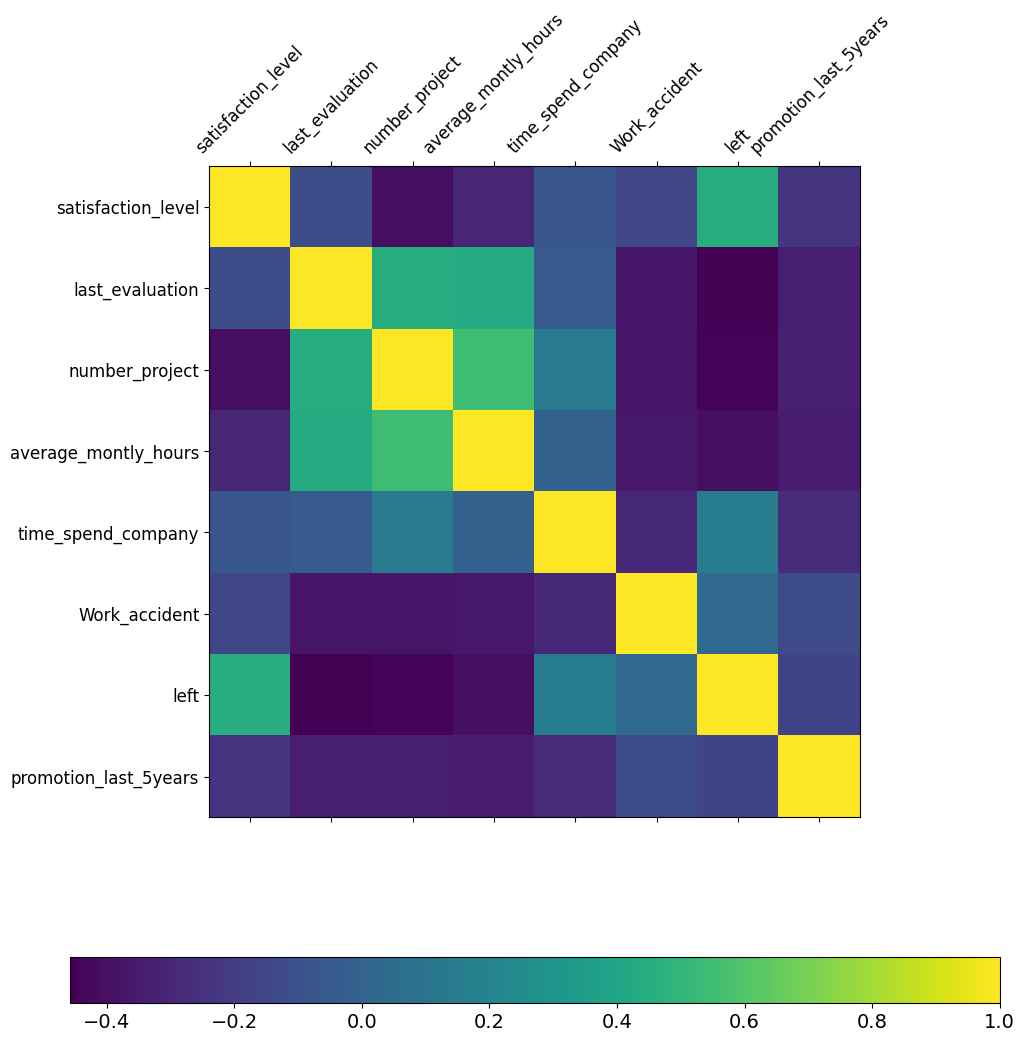

In [102]:
f = plt.figure(figsize=(12, 12))
plt.matshow(corr_spearman.corr(), fignum=f.number)
plt.xticks(range(corr_spearman.shape[1]), corr_spearman.columns, fontsize=12, rotation=45)
plt.yticks(range(corr_spearman.shape[1]), corr_spearman.columns, fontsize=12)
cb = plt.colorbar(orientation = "horizontal")
cb.ax.tick_params(labelsize=14)


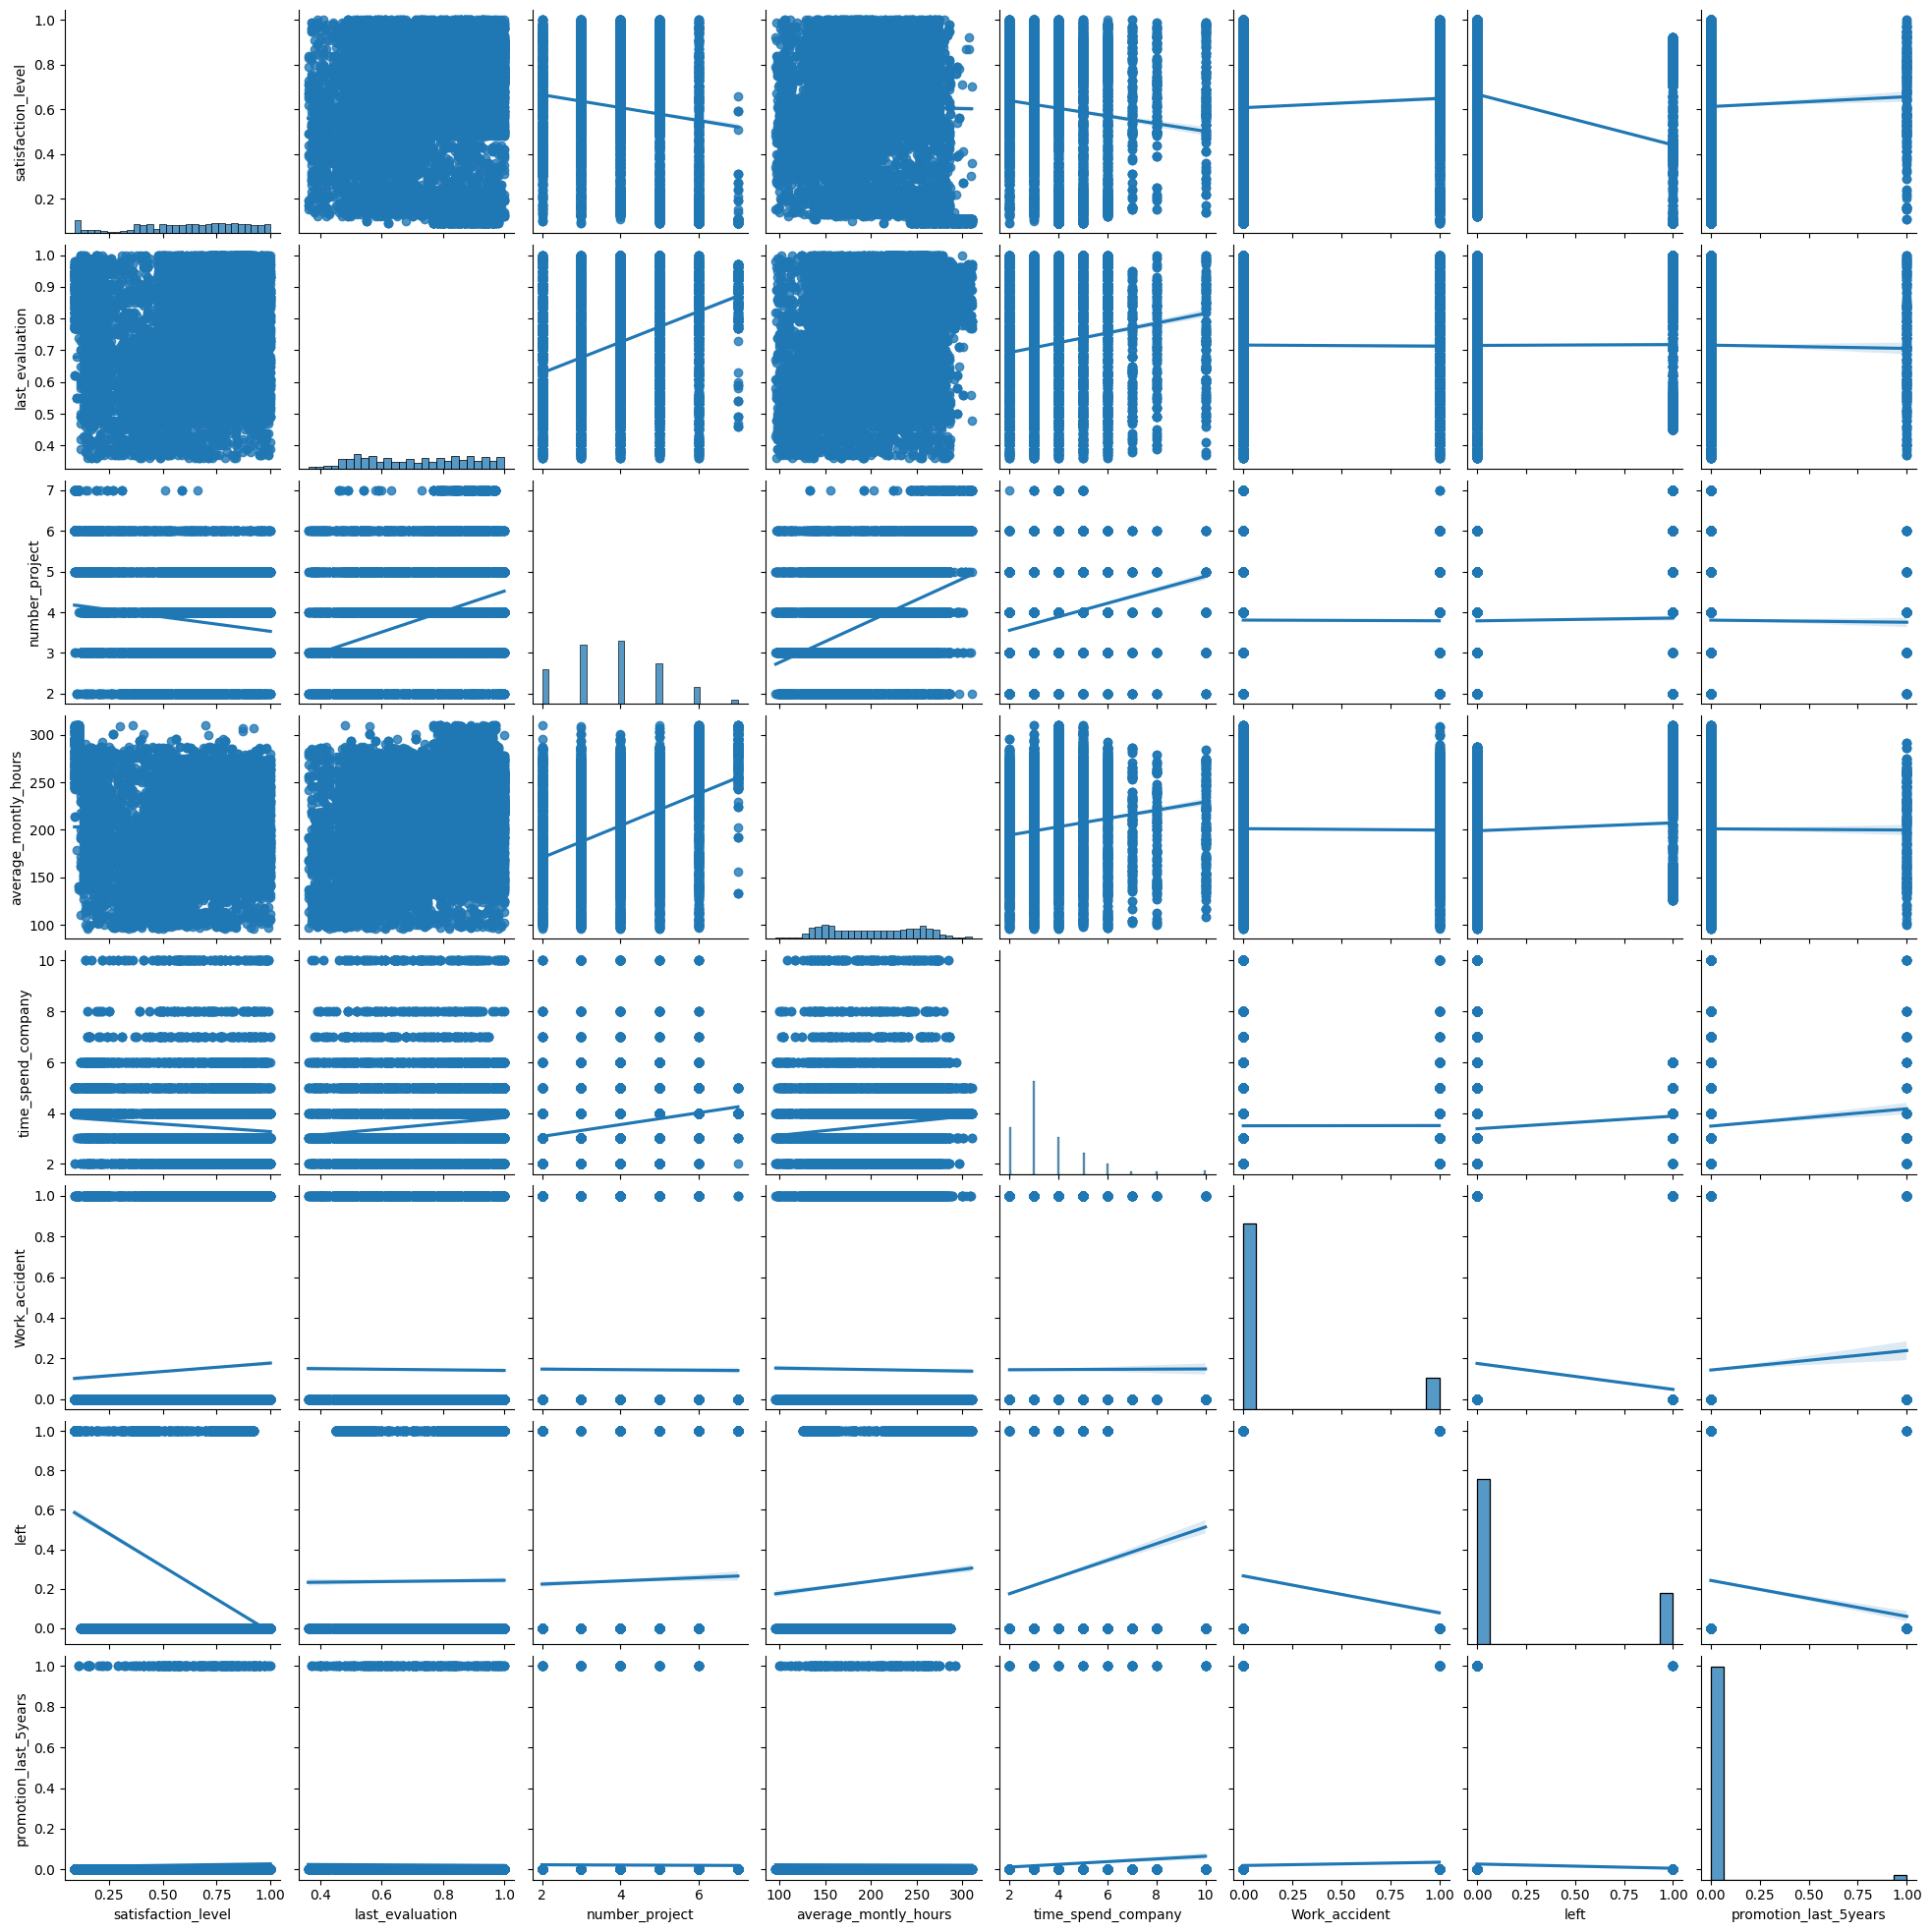

In [103]:
sns.pairplot(hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']], kind='reg')

### Рассчитайте сколько сотрудников работает в каждом департаменте


In [30]:
hr.groupby('department').count()['satisfaction_level']

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

### Показать распределение сотрудников по зарплатам

<Axes: title={'center': 'распределение сотрудников по зарплатам'}, ylabel='salary'>

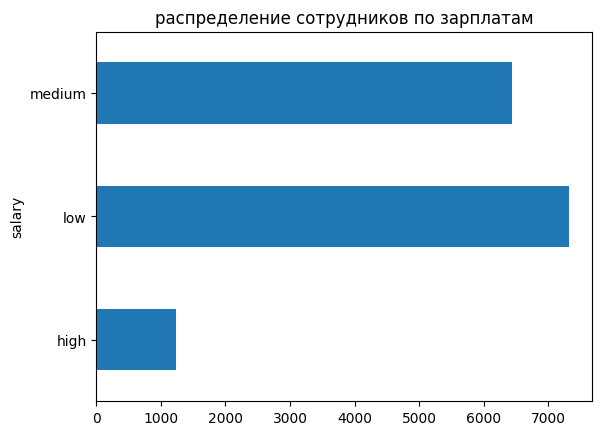

In [138]:
hr_salary = hr.groupby('salary').count()['satisfaction_level']
hr_salary.plot(kind="barh", title='распределение сотрудников по зарплатам')

### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

<Axes: title={'center': 'распределение сотрудников по зарплатам в каждом департаменте'}, ylabel='department,salary'>

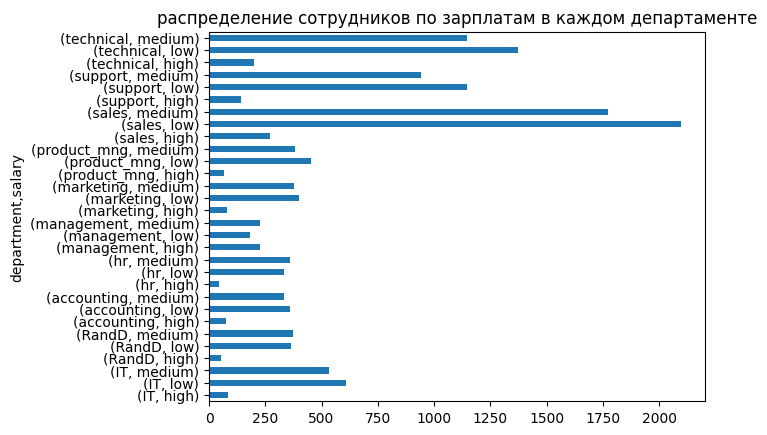

In [137]:
hr_salary = hr.groupby(['department', 'salary']).count()['satisfaction_level']
hr_salary.plot(kind="barh", title='распределение сотрудников по зарплатам в каждом департаменте')

### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [189]:
hr_high = list(hr.loc[hr['salary'] == 'high']['average_montly_hours'])
hr_low = list(hr.loc[hr['salary'] == 'low']['average_montly_hours'])
t, p = stats.ttest_ind(hr_high, hr_low)

# H0 = сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
print(p)
if p > 0.05:
    print('отвергаем гитопезу H0, время на работе не зависит от заплаты')
else:
    print('принимаем гитопезу H0, время на работе зависит от заплаты')

0.4661023478267259
отвергаем гитопезу H0, время на работе не зависит от заплаты


### Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов


In [197]:
hr_left = hr.loc[hr['left'] == 1]
hr_no_left = hr.loc[hr['left'] != 1]

показатели среди уволившихся

In [199]:
print(f"Доля сотрудников с повышением за последние 5 лет: {round(len(hr_left.loc[hr_left['promotion_last_5years'] == 1])/len(hr_left) * 100, 2)}%")
print(f"Средняя степень удовлетворенности: {round(hr_left['satisfaction_level'].mean(), 2)}")
print(f"Среднее количество проектов: {round(hr_left['number_project'].mean(), 2)}")

Доля сотрудников с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86


показатели среди не уволившихся

In [200]:
print(f"Доля сотрудников с повышением за последние 5 лет: {round(len(hr_no_left.loc[hr_no_left['promotion_last_5years'] == 1])/len(hr_no_left) * 100, 2)}%")
print(f"Средняя степень удовлетворенности: {round(hr_no_left['satisfaction_level'].mean(), 2)}")
print(f"Среднее количество проектов: {round(hr_no_left['number_project'].mean(), 2)}")

Доля сотрудников с повышением за последние 5 лет: 2.63%
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79


### Разделить данные на тестовую и обучающую выборки
### Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
### Оценить качество модели на тестовой выборки

In [233]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [219]:
X = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = hr['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

In [220]:
X_train.shape

(11249, 7)

In [222]:
X_test.shape

(3750, 7)

In [223]:
y_train.shape

(11249,)

In [225]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [226]:
model.coef_

array([[-4.50442229e+00,  6.67402683e-01, -2.37700842e-01,
         4.39743519e-03,  2.30165839e-01, -1.07004818e+00,
        -1.15550343e+00]])

In [227]:
model.intercept_

array([0.16353519])

In [228]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [235]:
print(f"Точность: {accuracy_score(y_test, model.predict(X_test))}")

Точность: 0.7586666666666667
